In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelBinarizer

from sklearn.preprocessing import LabelEncoder

In [2]:
iris_data = pd.read_csv("iris.csv", engine="python")    #reads in data

Text(0.5, 1.0, 'Statistics of Iris Dataset')

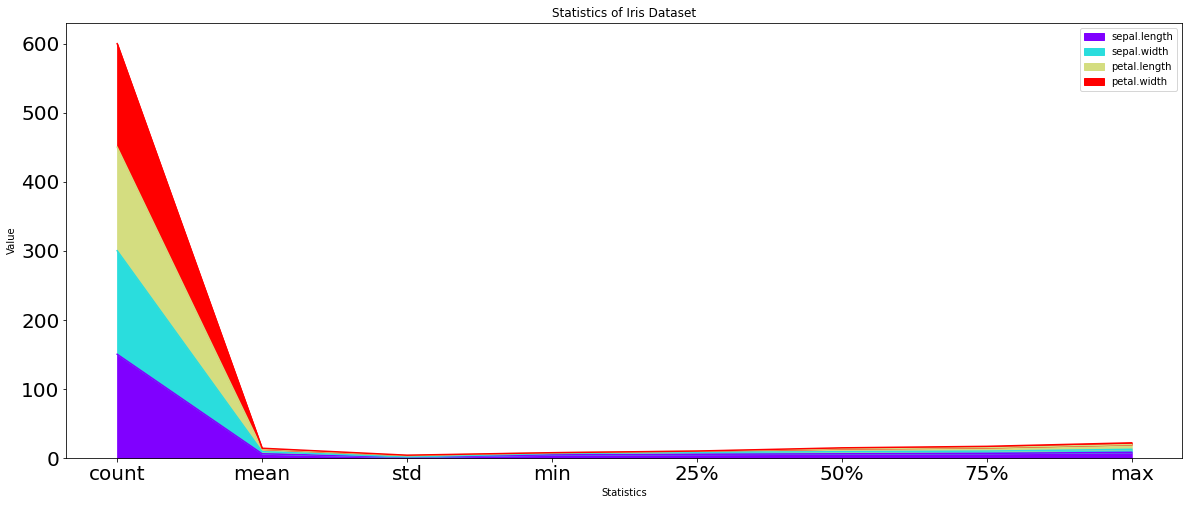

In [3]:
iris_data.describe().plot(kind="area", fontsize=20, figsize=(20, 8), table=False, colormap="rainbow")
plt.xlabel("Statistics")
plt.ylabel("Value")
plt.title("Statistics of Iris Dataset")

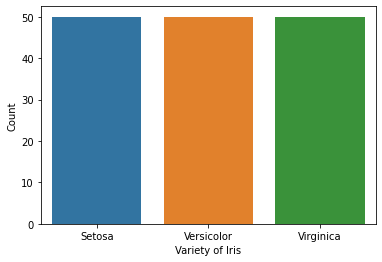

In [4]:
sns.countplot("variety", data=iris_data)
plt.xlabel("Variety of Iris")
plt.ylabel("Count")
plt.show()

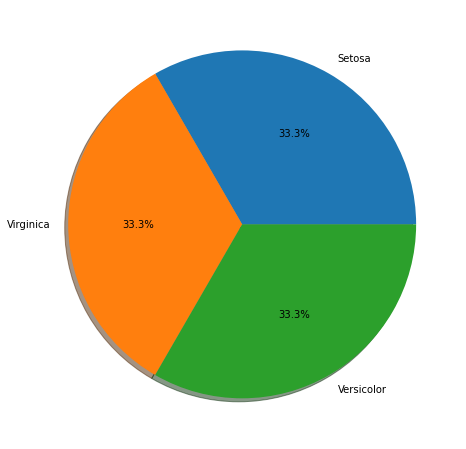

In [5]:
iris_data["variety"].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, figsize=(10,8))
plt.ylabel("")
plt.show()

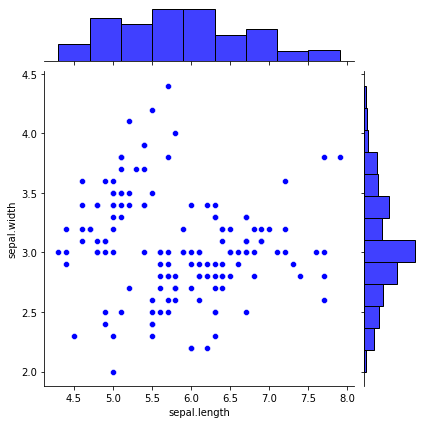

In [6]:
#Basically a scatterplot plus a histogram

figure = sns.jointplot(x = "sepal.length", y = "sepal.width", data = iris_data, color = "blue")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

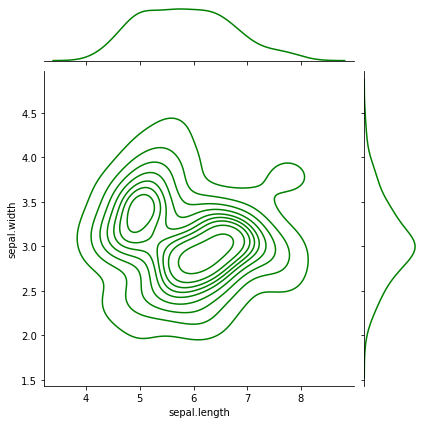

In [7]:
#Basically a scatterplot plus a histogram, but with density estimates

figure = sns.jointplot(x = "sepal.length", y = "sepal.width", data = iris_data, color = "green", kind="kde")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

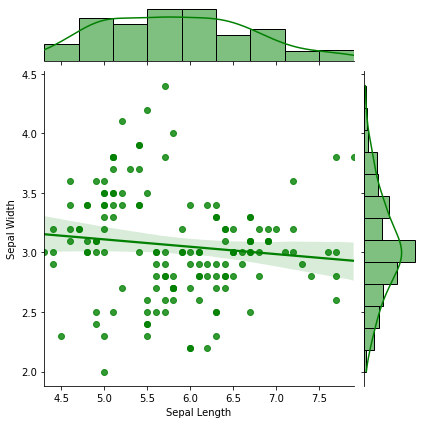

In [8]:
#Basically a scatterplot plus a histogram, but with regression added

figure = sns.jointplot(x = "sepal.length", y = "sepal.width", data = iris_data, color = "green", kind="reg")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

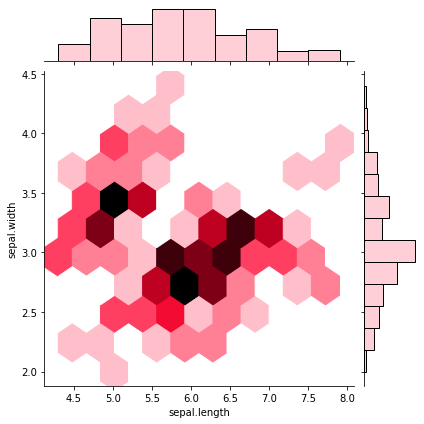

In [9]:
#Replacing scatterplot with hexagonal bins as part of the joint histogram

figure = sns.jointplot(x = "sepal.length", y = "sepal.width", data = iris_data, color = "pink", kind="hex")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

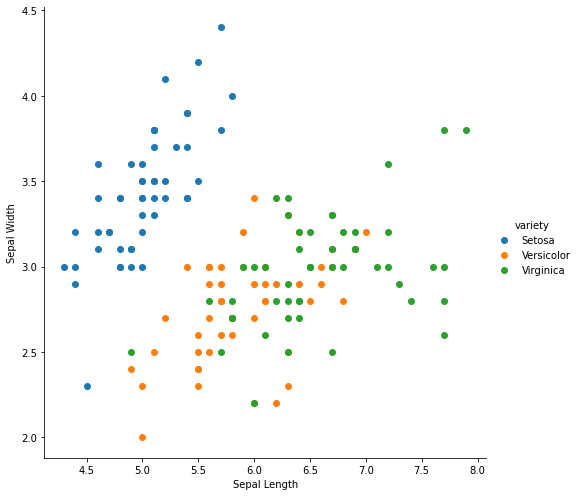

In [10]:
#Facetgrid for plotting conditional relationships

figure = sns.FacetGrid(iris_data,hue = "variety", height = 7).map(plt.scatter,"sepal.length", "sepal.width").add_legend()
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

array([[<AxesSubplot:title={'center':'petal.length'}, xlabel='[variety]'>,
        <AxesSubplot:title={'center':'petal.width'}, xlabel='[variety]'>],
       [<AxesSubplot:title={'center':'sepal.length'}, xlabel='[variety]'>,
        <AxesSubplot:title={'center':'sepal.width'}, xlabel='[variety]'>]],
      dtype=object)

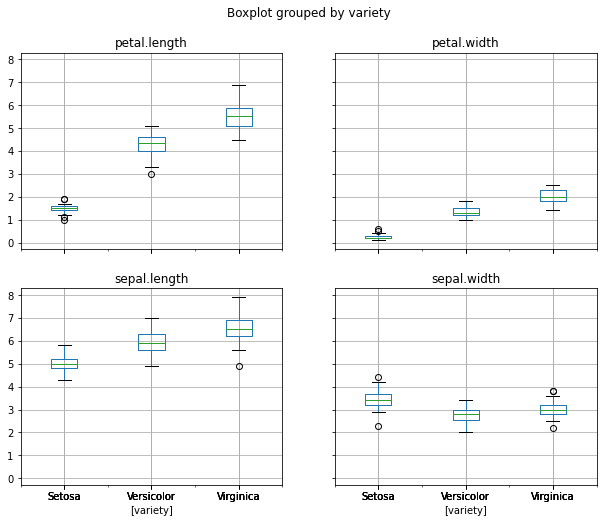

In [11]:
#Boxplot by variety of iris

iris_data.boxplot(by="variety", figsize=(10,8))

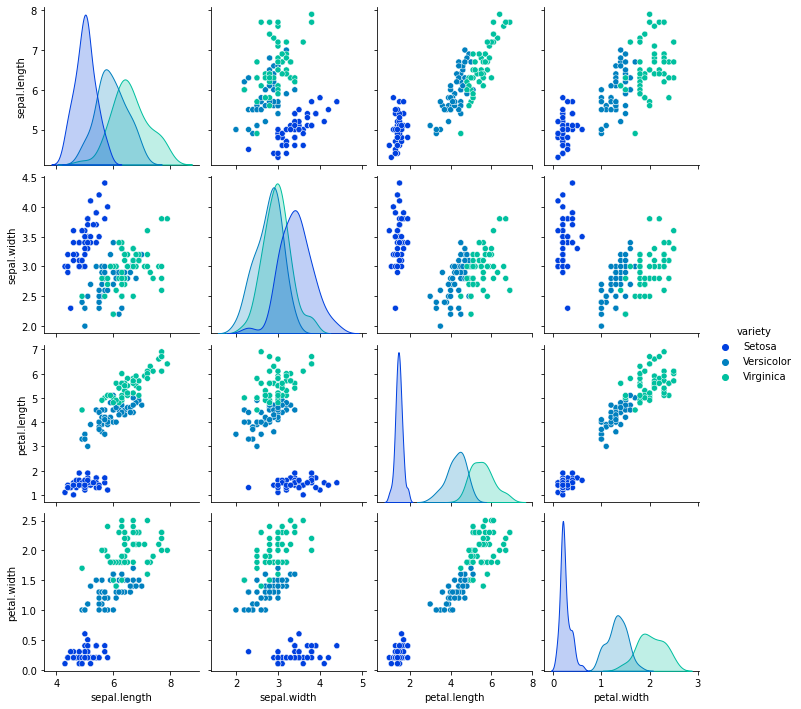

In [12]:
#Pair Plot - how all the variables can be paired with all the other variables

sns.pairplot(data = iris_data, kind = "scatter", hue = "variety", dropna = True, palette = "winter")

<AxesSubplot:>

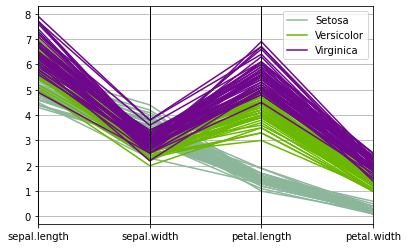

In [13]:
#Parallel Coordinate Plot to plot multivariate numerical data, like we have in this dataset

from pandas.plotting import parallel_coordinates
parallel_coordinates(iris_data, "variety")

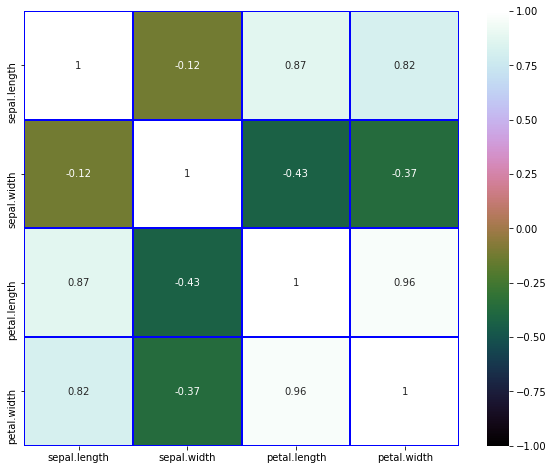

In [14]:
#Heatmap to find correlations between our parameters/variables

fig = plt.gcf()
fig.set_size_inches(10, 8)
fig = sns.heatmap(iris_data.corr(), vmin = -1, vmax = 1, cmap = "cubehelix", linewidths = 1, linecolor = "blue", cbar = True, \
                 cbar_kws = {"orientation" : "vertical"}, square = True, annot = True, mask = False)

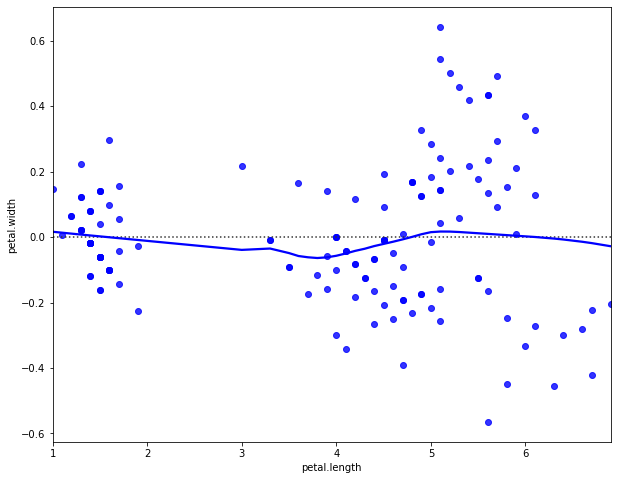

In [15]:
#Residual Plot to find the residuals of our data

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
fig = sns.residplot("petal.length", "petal.width", data = iris_data, lowess = True, dropna = True, color = "blue")